[<img src="obsidian.png" alt="obsidiancode.io" width="300">](http://obsidiancode.io/)


# Why do some patients not show up for their doctor's appointment ?

## Analysis by: Robert Leckenby, PhD

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen to investigate the [**Medical Appointment No Shows database**](https://www.kaggle.com/joniarroba/noshowappointments). This dataset looks at a large volume of appointements (110527 entries are recorded) and provides the following 14 data for each row:
<ol>
<li>**PatientId** - Unique Identification of a patient. *>>check that unique*</li>
<li>**AppointmentID** - Unique Identification of each appointment. *>>check that unique*</li>
<li>**Gender** - Male or Female . Female is the greater proportion *>>check this assertion*, women take much better care of their health in comparison to men *>>cannot be deduced from these data*.</li>
<li>**ScheduledDay** - The day of the actual appointment, when they have to visit the doctor. </li>
<li>**AppointmentDay** - The day someone called or registered the appointment, this is before the appointment of course. *>>check this is in fact the case* </li>
<li>**Age** - How old is the patient.</li>
<li>**Neighbourhood** - Where the appointment takes place.</li>
<li>**Scholarship** - True of False . Observation, this is a broad topic, consider reading [this article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) </li>
<li>**Hypertension** - True or False</li>
<li>**Diabetes** - True or False</li>
<li>**Alcoholism** - True or False</li>
<li>**Handicap** - True or False</li>
<li>**SMS_received** - 1 or more messages sent to the patient.</li>
<li>**No-show** - Yes if No-show or No if Showed up for appointment. *>>this column needs clarifying with True/False for no-show*</li>
</ol>

**N.B.1:** *typos and English have been corrected in the fields above, these corrections will need to be made in the data set also to avoid mistakes during data analysis*

**N.B.2:** *comments in italic after each point are things to check in the data before running the analysis*

In it's opening line on the [source page](https://www.kaggle.com/joniarroba/noshowappointments) it asks:
"**Why do 30% of patients miss their scheduled appointments?**"
This is an interesting question and opens the door to the analysis that I propose to make. So let's ask ourselves the following questions:

## Questions to investigate
#### From the Doctor's perspective
<ol>
<li>Establish what percentage of 'no shows' can be expected as a function of the patients themselves, is the claim of 30% no shows in the Database documentation correct ?
</li>
<li>Do any temporal patterns exist that allow better planning for medical practises ?</li>
<li>Investigate any correlation between the medical conditions the patients have and their likelihood of missing an appointment.
</li>
<li>Does the neighbourhood - which may be a very loose proxy for social-economic level of the patients - have any impact on their showing up or not ?
</li>
<li>Because sending *sms* reminders to patients takes time, energy and has a cost, is there a number of messages needed to ensure patients show-up ? Is there a number of *sms* messages beyond which patients never show up anyway ?
</li>
</ol>

#### From the Patient's perspective
<ol start=6>
<li>Does the patient always receive a minimum of 1 (one) *sms* notification before an appointment ?</li>
</ol>

In [194]:
# END OF INTRODUCTION

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [195]:
# CODE SETUP (IMPORTS) AND DATA WRANGLING

In [196]:
## Library imports ##
# Importing pandas, matplotlib and numpy to ease data wrangling and analysis
# as well as to leverage powerful inline plots
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

In [197]:
## Data loading and quicklook ##
# The source file has been renamed 'noshow.csv' in the CLI to avoid typing the full name each time.
# The original file is kept in a seperate sub-folder 'source_files' so that the 'raw data' remains available.
df_noshow = pd.read_csv('noshow.csv')

In [198]:
## Investigate the data ##
# df.shape to see how many rows and columns exist
df_noshow.shape

(110527, 14)

In [199]:
# df.info() to check whether Null values exist, and what the data-types are
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [200]:
# view missing value count for each column - should be zero for all columns
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [201]:
# df.head() to visually inspect the first few rows and identify any problematic data
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [202]:
# df.tail() to validated row count
df_noshow.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [203]:
# as PatientId is a float and is displayed in scientific notation, let's just check that it is read correctly:
# pd.options.display.float_format = '{:20,.2f}'.format
test = df_noshow[:1]['PatientId']
test

0    2.987250e+13
Name: PatientId, dtype: float64

In [204]:
# This shows that all values are read correctly, it is only a display issue on large int values.
# the line `pd.options.display.float_format = '{:20,.2f}'.format` is commented out above as it is only used for QC

### Data Cleaning

### General Properties summary:
<ol>
<li>The csv file could be read correctly - except PatientId as discussed below</li>
<li>The data columns indicated in the source documentation *are all found* in the file.</li>
<li>Some column names display typos or inconsistencies
    <ul>
    <li>"PatientId" should read "PatientID"</li>
    <li>"Hipertension" should read "Hypertension"</li>
    <li>"Handcap" should read "Handicap</li>
    </ul>
</li>
<li>Some data types are not optimal, in particular
    <ul>
    <li>The PatientID has been read as a `float` by read_csv() whereas it appears to be an `int` in the raw csv file, however checking with:</li>
    `pd.options.display.float_format = '{:20,.2f}'.format`<br>
    to see the full value shows that the `int` is recorded correctly and this is only a display issue, i.e. no changes to be made
    <li>The ScheduledDay and AppointmentDay fields are saved as strings, datetime would be more useful</li>
    <li>Medical conditions are stored as ints (0 or 1), a boolean would be simpler</li>
    <li>No-show is saved as a string, again a boolean would be simpler</li>
    </ul>
</li>
<li>ScheduledDay and AppointmentDay, while strings, have the correct format for datetime</li>
</ol>

### Task list before data analysis:
<ol>
<li>Rename 'PatientId' to 'PatientID', 'Hipertension' to 'Hypertension' and 'Handcap' to 'Handicap', then check the changes have been made `inplace`.</li>
<li>Change data type of 'AppointmentDay' and 'ScheduledDay' to `datetime` and check changes made correctly</li>
<li>Change all medical conditions to `Boolean`: **`True` for 'has-condition'** and **`False` for 'does-not-have-condition'**</li>
<li>Change 'No-show' to `Boolean`: **`True` for 'did-not-show'** and **`False` for 'did-show'**</li>
</ol>

In [205]:
# 1. df.rename() to rename columns
df_noshow.rename(index=str, columns={"PatientId": "PatientID","Hipertension": "Hypertension", "Handcap": "Handicap"}, inplace=True);

In [206]:
# check the changes have been made correctly
df_noshow.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [207]:
# 2. datetime data types

In [208]:
# change 'ScheduledDay' to pd.datetime
df_noshow['ScheduledDay'] = pd.to_datetime(df_noshow['ScheduledDay'])
# check changes done correctly
df_noshow.head(3)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [209]:
# change 'AppointmentDay' to pd.datetime
df_noshow['AppointmentDay'] = pd.to_datetime(df_noshow['AppointmentDay'])
# check changes done correctly
df_noshow.head(3)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [210]:
# 3. Medical conditions to `boolean`

In [211]:
# change all medical conditions to boolean values
df_noshow[['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap']] = df_noshow[['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap']].astype(bool)
# check changes done correctly
df_noshow.head(5)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,No


In [212]:
# 4. 'No-show' to `Boolean`

In [213]:
# change 'No-show' column to boolean. Ensuring True for 'did-not-show' and False for 'did-show'
# this will be cast to Boolean automatically
df_noshow['No-show'] = df_noshow['No-show'].replace(['Yes','No'],[True,False])
# check changes done correctly
df_noshow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,False


In [214]:
# Check types of columns after data cleaning
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null bool
Hypertension      110527 non-null bool
Diabetes          110527 non-null bool
Alcoholism        110527 non-null bool
Handicap          110527 non-null bool
SMS_received      110527 non-null int64
No-show           110527 non-null bool
dtypes: bool(6), datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 8.2+ MB


In [219]:
# The column names have been changed correctly, and all the columns have logical and useful data types.
# This will make the analyis easier.
df_noshow.head(10)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,False
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,False,True,False,False,False,0,False
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,0,True
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,0,True
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,False,False,False,False,False,0,False
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,False,False,False,False,False,0,False


In [216]:
# End of data wrangling

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1 - What percentage of 'no-shows' is observed in the data set?

Establish what percentage of 'no shows' can be expected as a function of the patients themselves, is the claim of 30% no shows in the Database documentation correct ?

In [250]:
# count the number of True rows for the No-show column
count_true = df_noshow[df_noshow['No-show'] == True].count()
count_true

PatientID         22319
AppointmentID     22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hypertension      22319
Diabetes          22319
Alcoholism        22319
Handicap          22319
SMS_received      22319
No-show           22319
dtype: int64

In [252]:
# count the number of False rows for the No-show column, sum with the value for True and check if same as total
# should return True for all columns
count_false = df_noshow[df_noshow['No-show'] == False].count()
check_tot = count_false + count_true
check_tot == df_noshow.count()

PatientID         True
AppointmentID     True
Gender            True
ScheduledDay      True
AppointmentDay    True
Age               True
Neighbourhood     True
Scholarship       True
Hypertension      True
Diabetes          True
Alcoholism        True
Handicap          True
SMS_received      True
No-show           True
dtype: bool

In [253]:
# calculate the ratio of no shows to total
ratio_noshow = count_true / df_noshow.count()
ratio_noshow

PatientID         0.201933
AppointmentID     0.201933
Gender            0.201933
ScheduledDay      0.201933
AppointmentDay    0.201933
Age               0.201933
Neighbourhood     0.201933
Scholarship       0.201933
Hypertension      0.201933
Diabetes          0.201933
Alcoholism        0.201933
Handicap          0.201933
SMS_received      0.201933
No-show           0.201933
dtype: float64

In [259]:
# an alternate method of counting
df_noshow['No-show'].value_counts()

False    88208
True     22319
Name: No-show, dtype: int64

In [261]:
# and the same method directly yielding relative frequencies of each condition
df_noshow['No-show'].value_counts(True)

False    0.798067
True     0.201933
Name: No-show, dtype: float64

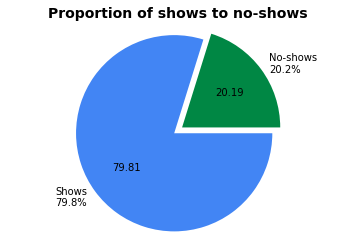

In [310]:
# Visualisation, as this is a simple binary question, a sipie chart should provide a telling image:
labels = 'No-shows\n20.2%', 'Shows\n79.8%'
data = [0.201933, 0.798067]
clr = ['#008744','#4285f4']
explosion = [0.1,0]
figureObject, axesObject = plt.subplots()
axesObject.pie(data,labels=labels,autopct='%1.2f',colors=clr,startangle=0,explode=explosion)
axesObject.axis('equal')
plt.title('Proportion of shows to no-shows', fontsize=14, fontweight='bold')
plt.show()

### Answer 1
This quicklook analysis shows that in the data set provided, there are **not 30%** of no-shows but **20.2%**. It is not clear why the claim of 30% no shows was made on the [source page](https://www.kaggle.com/joniarroba/noshowappointments) of the project.
<br>That said, a fifth of patients missing their appointments is still high, so the following questions remain of interest.
<br>
*N.B.: Different methods are shown to learn more than one approach to solving the same problem.*

### Question 2 - Investigate any temporal patterns affecting no-shows

Do any temporal patterns exist that allow better planning for medical practises ? Are there more absences on Fridays for example ?

### Question 3 - Does a pre-existing medical condition predispose a patient to missing an appointment ?

Investigate any correlation between the medical conditions the patients have and their likelihood of missing an appointment.

### Question 4 - Do some hospitals see a greater proportion of no-shows than others ?

Does the neighbourhood - which may be a very loose proxy for social-economic level of the patients - have any impact on their showing up or not ?

### Question 5 - Does the number of sms messages sent have a quantifiable impact on no-shows ?

Because sending sms reminders to patients takes time, energy and has a cost, is there a number of messages needed to ensure patients show-up ? Is there a number of sms messages beyond which patients never show up anyway ?

### Question 6 - When is an sms message sent out to a patient, is it systematic ?

Does the patient always receive a minimum of 1 (one) sms notification before an appointment ?

In [62]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# some variation of this to work out %-age of no-shows
df_noshow['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [ ]:
# End of Exploratory Data Analysis

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

In [ ]:
# End of Conclusions

<a id='references'></a>
## References
<ol>
<li>ref1</li>
<li>ref2</li>
<li>ref3</li>
<li>ref4</li>
</ol>

In [ ]:
# End of References